In [2]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
import matplotlib.pyplot as plt

In [3]:
sequence=np.array([i for i in range(1,101)])
window_size=3
x=[]
y=[]
for i in range(len(sequence)-window_size):
  x.append(sequence[i:i+window_size])
  y.append(sequence[i+window_size])


In [4]:
x=np.array(x)
y=np.array(y)
x=x.reshape((x.shape[0],x.shape[1],1))

In [6]:
model=Sequential()
model.add(SimpleRNN(50,activation='relu',input_shape=(window_size,1)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [7]:
model.fit(x,y,epochs=500,verbose=0)
print("model trained successfully")

model trained successfully


In [16]:
test_input=np.array([2,3,4])
test_input=test_input.reshape((1,window_size,1))

In [17]:
predicted=model.predict(test_input,verbose=0)
print(f"predicted next number:{predicted[0][0]:.2f}")

predicted next number:4.54


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step  


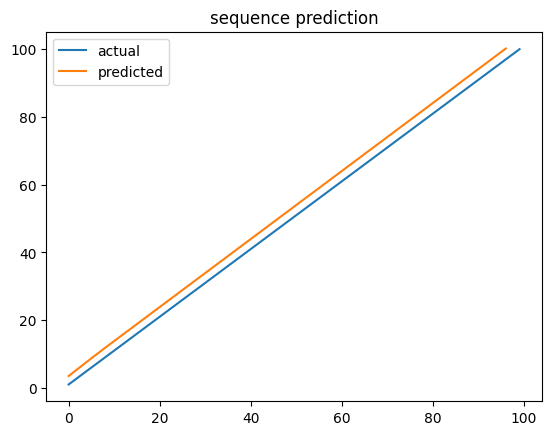

In [18]:
predictions=model.predict(x)
plt.plot(sequence,label='actual')
plt.plot(predictions,label='predicted')
plt.legend()
plt.title("sequence prediction")
plt.show()